# Exploratory Data Analysis

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> To identify the key demographic factors which can predict which individuals are most likely to have or use a bank account in Kenya, Rwanda, Tanzania and Uganda.


### b) Defining the Metric for Success

Strong relationship between a variable and a respondent having a back account.

### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [ ]:
# Importing libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Loading the data from the source

df = pd.read_csv('https://bit.ly/FinancialDataset')

## 3. Checking the Data

In [ ]:
# Determining the no. of records in our dataset
df.shape

(23524, 13)

In [ ]:
# Previewing the top of our dataset
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
# Previewing the bottom of our dataset
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [ ]:
# Checking whether each column has an appropriate datatype
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

## 4. External Data Source Validation

## 5. Tidying the Dataset

In [ ]:
# Standardized column names

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.columns.values.tolist()

['country',
 'year',
 'uniqueid',
 'has_a_bank_account',
 'type_of_location',
 'cell_phone_access',
 'household_size',
 'respondent_age',
 'gender_of_respondent',
 'the_relathip_with_head',
 'marital_status',
 'level_of_educuation',
 'type_of_job']

In [ ]:
df.rename(columns={'the_relathip_with_head' : 'the_relationship_with_head', 'level_of_educuation' :'level_of_education'} , inplace=True)

In [ ]:
df.head()

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_head,marital_status,level_of_education,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
# Counting data in the columns

df.count()

# We notice that the are missing values in most columns.

country                       23510
year                          23524
uniqueid                      23524
has_a_bank_account            23488
type_of_location              23509
cell_phone_access             23513
household_size                23496
respondent_age                23490
gender_of_respondent          23490
the_relationship_with_head    23520
marital_status                23492
level_of_education            23495
type_of_job                   23494
dtype: int64

In [ ]:
# Counting all null data in the dataset

np.count_nonzero(df.isnull())

267

In [ ]:
# Counting all null data per columns

df.isnull().sum()

country                       14
year                           0
uniqueid                       0
has_a_bank_account            36
type_of_location              15
cell_phone_access             11
household_size                28
respondent_age                34
gender_of_respondent          34
the_relationship_with_head     4
marital_status                32
level_of_education            29
type_of_job                   30
dtype: int64

In [ ]:
df.nunique()

country                          4
year                             6
uniqueid                      8735
has_a_bank_account               2
type_of_location                 2
cell_phone_access                2
household_size                  21
respondent_age                  85
gender_of_respondent             2
the_relationship_with_head       6
marital_status                   5
level_of_education               7
type_of_job                     10
dtype: int64

In [ ]:
# Checking for duplicates

df.duplicated().sum()

0

In [ ]:
df.shape

(23524, 13)

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(23343, 13)

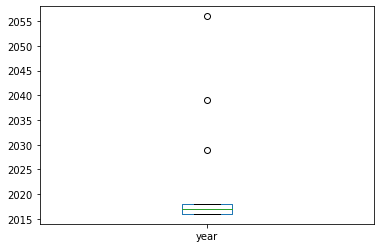

In [ ]:
df.boxplot(column =['year'], grid = False) 

In [ ]:
# Identifying outliers

df[df['year'] > 2018]

# There are three outliers. We will drop this data in order to carry out Factor Analysis.

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_head,marital_status,level_of_education,type_of_job
213,Kenya,2029,uniqueid_214,No,Urban,Yes,6.0,16.0,Male,Other relative,Single/Never Married,Secondary education,Remittance Dependent
308,Kenya,2056,uniqueid_309,Yes,Urban,Yes,4.0,40.0,Male,Head of Household,Married/Living together,Tertiary education,Formally employed Private
7014,Rwanda,2039,uniqueid_947,No,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Primary education,Informally employed


In [ ]:
# Only selecting data for years less than or equal to 2018

df = df[df['year'] <= 2018]
df.head()

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_head,marital_status,level_of_education,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


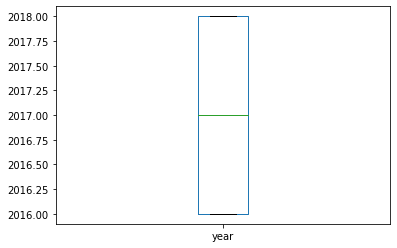

In [ ]:
df.boxplot(column =['year'], grid = False) 

In [ ]:
# Verifying that the dataset only has 3 unique values

df.year.nunique()

3

In [ ]:
# Verifying 2016, 2017 and 2018 data only

df.year.unique()

array([2018, 2016, 2017])

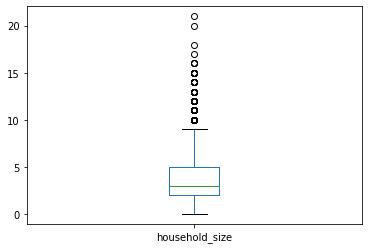

In [ ]:
df.boxplot(column =['household_size'], grid = False) 

# contains outliers

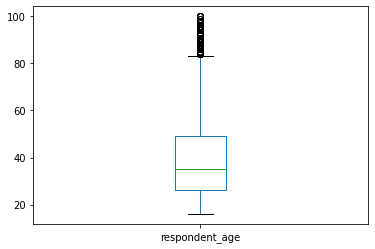

In [ ]:
df.boxplot(column =['respondent_age'], grid = False) 

# contains outliers

In [ ]:
# Verifying unique data contained in cateogical variable

df.has_a_bank_account.unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
# Verifying unique data contained in cateogical variable

df.type_of_location.unique()

array(['Rural', 'Urban'], dtype=object)

In [ ]:
# Verifying unique data contained in cateogical variable

df.cell_phone_access.unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
# Verifying unique data contained in cateogical variable

df.gender_of_respondent.unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
# Verifying unique data contained in cateogical variable

df.the_relationship_with_head.unique()

array(['Spouse', 'Head of Household', 'Other relative', 'Child', 'Parent',
       'Other non-relatives'], dtype=object)

In [ ]:
# Verifying unique data contained in cateogical variable

df.marital_status.unique()

array(['Married/Living together', 'Widowed', 'Single/Never Married',
       'Divorced/Seperated', 'Dont know'], dtype=object)

In [ ]:
# Verifying unique data contained in cateogical variable

df.type_of_job.unique()

array(['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer', 'No Income'], dtype=object)

In [ ]:
# Verifying unique data contained in cateogical variable

df.level_of_education.unique()

# '6' is likely a mistake. We will drop these rows.

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA', '6'], dtype=object)

In [ ]:
df[df["level_of_education"] == "6"]

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_head,marital_status,level_of_education,type_of_job
6867,Rwanda,2016,uniqueid_800,No,Rural,No,5.0,34.0,Female,Spouse,Married/Living together,6,Informally employed
7937,Rwanda,2016,uniqueid_1870,No,Rural,No,8.0,31.0,Female,Spouse,Married/Living together,6,Informally employed
8226,Rwanda,2016,uniqueid_2159,No,Rural,No,2.0,80.0,Male,Head of Household,Married/Living together,6,Informally employed
8453,Rwanda,2016,uniqueid_2386,No,Urban,Yes,3.0,36.0,Female,Head of Household,Divorced/Seperated,6,Informally employed
8778,Rwanda,2016,uniqueid_2711,No,Rural,Yes,4.0,44.0,Male,Head of Household,Married/Living together,6,Informally employed
9269,Rwanda,2016,uniqueid_3202,Yes,Urban,Yes,2.0,70.0,Female,Head of Household,Widowed,6,Remittance Dependent
9878,Rwanda,2016,uniqueid_3811,No,Rural,No,2.0,48.0,Female,Spouse,Married/Living together,6,Formally employed Private
9944,Rwanda,2016,uniqueid_3877,Yes,Urban,Yes,3.0,38.0,Male,Head of Household,Married/Living together,6,Informally employed
10560,Rwanda,2016,uniqueid_4493,No,Rural,Yes,6.0,48.0,Female,Spouse,Married/Living together,6,Informally employed
10767,Rwanda,2016,uniqueid_4700,No,Rural,No,2.0,63.0,Female,Head of Household,Divorced/Seperated,6,Informally employed


In [ ]:
df.drop(df[df['level_of_education'] == '6' ].index, inplace = True)

In [ ]:
df.shape

(23313, 13)

In [ ]:
# Dropping unnecessary columns 
# 
df.drop(['uniqueid'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23313 entries, 0 to 23523
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     23313 non-null  object 
 1   year                        23313 non-null  int64  
 2   has_a_bank_account          23313 non-null  object 
 3   type_of_location            23313 non-null  object 
 4   cell_phone_access           23313 non-null  object 
 5   household_size              23313 non-null  float64
 6   respondent_age              23313 non-null  float64
 7   gender_of_respondent        23313 non-null  object 
 8   the_relationship_with_head  23313 non-null  object 
 9   marital_status              23313 non-null  object 
 10  level_of_education          23313 non-null  object 
 11  type_of_job                 23313 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 2.3+ MB


Converting categorical data to numerical data so as to be able to analyse the dataset.

In [ ]:
# converting type of columns to 'category'

df['country'] = df['country'].astype('category')
df['has_a_bank_account'] = df['has_a_bank_account'].astype('category')
df['type_of_location'] = df['type_of_location'].astype('category')
df['cell_phone_access'] = df['cell_phone_access'].astype('category')
df['gender_of_respondent'] = df['gender_of_respondent'].astype('category')
df['the_relationship_with_head'] = df['the_relationship_with_head'].astype('category')
df['marital_status'] = df['marital_status'].astype('category')
df['level_of_education'] = df['level_of_education'].astype('category')
df['type_of_job'] = df['type_of_job'].astype('category')


In [ ]:
# Assigning numerical values and storing in another column
df['country_cat'] = df['country'].cat.codes
df['has_a_bank_account_cat'] = df['has_a_bank_account'].cat.codes
df['type_of_location_cat'] = df['type_of_location'].cat.codes
df['cell_phone_access_cat'] = df['cell_phone_access'].cat.codes
df['gender_of_respondent_cat'] = df['gender_of_respondent'].cat.codes
df['the_relationship_with_head_cat'] = df['the_relationship_with_head'].cat.codes
df['marital_status_cat'] = df['marital_status'].cat.codes
df['level_of_education_cat'] = df['level_of_education'].cat.codes
df['type_of_job_cat'] = df['type_of_job'].cat.codes

In [ ]:
df.head()

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_head,marital_status,level_of_education,type_of_job,country_cat,has_a_bank_account_cat,type_of_location_cat,cell_phone_access_cat,gender_of_respondent_cat,the_relationship_with_head_cat,marital_status_cat,level_of_education_cat,type_of_job_cat
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed,0,1,0,1,0,5,2,3,9
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent,0,0,0,0,0,1,4,0,4
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,0,1,1,1,1,3,3,5,9
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,0,0,0,1,0,1,2,2,3
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed,0,0,1,0,1,0,3,2,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23313 entries, 0 to 23523
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   country                         23313 non-null  category
 1   year                            23313 non-null  int64   
 2   has_a_bank_account              23313 non-null  category
 3   type_of_location                23313 non-null  category
 4   cell_phone_access               23313 non-null  category
 5   household_size                  23313 non-null  float64 
 6   respondent_age                  23313 non-null  float64 
 7   gender_of_respondent            23313 non-null  category
 8   the_relationship_with_head      23313 non-null  category
 9   marital_status                  23313 non-null  category
 10  level_of_education              23313 non-null  category
 11  type_of_job                     23313 non-null  category
 12  country_cat       

In [ ]:
# Creating a separate dataset for orginal dataset (by dropping all numerical data)


df_original = df[['country', "year", "has_a_bank_account", "type_of_location", "cell_phone_access",
                   "household_size", "respondent_age", "gender_of_respondent","the_relationship_with_head",
                   "marital_status", "level_of_education", "type_of_job"]]

df_original.head()

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_head,marital_status,level_of_education,type_of_job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
df_original.shape

(23313, 12)

In [ ]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23313 entries, 0 to 23523
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   country                     23313 non-null  category
 1   year                        23313 non-null  int64   
 2   has_a_bank_account          23313 non-null  category
 3   type_of_location            23313 non-null  category
 4   cell_phone_access           23313 non-null  category
 5   household_size              23313 non-null  float64 
 6   respondent_age              23313 non-null  float64 
 7   gender_of_respondent        23313 non-null  category
 8   the_relationship_with_head  23313 non-null  category
 9   marital_status              23313 non-null  category
 10  level_of_education          23313 non-null  category
 11  type_of_job                 23313 non-null  category
dtypes: category(9), float64(2), int64(1)
memory usage: 935.0 KB


In [ ]:
# Creating a separate dataset for numerical data (by dropping all categorical data)


df_numerical = df[['country_cat', "year", "has_a_bank_account_cat", "type_of_location_cat", "cell_phone_access_cat",
                   "household_size", "respondent_age", "gender_of_respondent_cat","the_relationship_with_head_cat",
                   "marital_status_cat", "level_of_education_cat", "type_of_job_cat"]]

df_numerical.head()

,country_cat,year,has_a_bank_account_cat,type_of_location_cat,cell_phone_access_cat,household_size,respondent_age,gender_of_respondent_cat,the_relationship_with_head_cat,marital_status_cat,level_of_education_cat,type_of_job_cat
0,0,2018,1,0,1,3.0,24.0,0,5,2,3,9
1,0,2018,0,0,0,5.0,70.0,0,1,4,0,4
2,0,2018,1,1,1,5.0,26.0,1,3,3,5,9
3,0,2018,0,0,1,5.0,34.0,0,1,2,2,3
4,0,2018,0,1,0,8.0,26.0,1,0,3,2,5


In [ ]:
df_numerical.shape

(23313, 12)

In [ ]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23313 entries, 0 to 23523
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country_cat                     23313 non-null  int8   
 1   year                            23313 non-null  int64  
 2   has_a_bank_account_cat          23313 non-null  int8   
 3   type_of_location_cat            23313 non-null  int8   
 4   cell_phone_access_cat           23313 non-null  int8   
 5   household_size                  23313 non-null  float64
 6   respondent_age                  23313 non-null  float64
 7   gender_of_respondent_cat        23313 non-null  int8   
 8   the_relationship_with_head_cat  23313 non-null  int8   
 9   marital_status_cat              23313 non-null  int8   
 10  level_of_education_cat          23313 non-null  int8   
 11  type_of_job_cat                 23313 non-null  int8   
dtypes: float64(2), int64(1), int8(9)

In [ ]:
df_bank_account = df[df['has_a_bank_account'] == 'Yes' ]
df_bank_account.head()

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_head,marital_status,level_of_education,type_of_job,country_cat,has_a_bank_account_cat,type_of_location_cat,cell_phone_access_cat,gender_of_respondent_cat,the_relationship_with_head_cat,marital_status_cat,level_of_education_cat,type_of_job_cat
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed,0,1,0,1,0,5,2,3,9
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,0,1,1,1,1,3,3,5,9
8,Kenya,2018,Yes,Rural,Yes,3.0,54.0,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing,0,1,0,1,1,1,2,3,1
11,Kenya,2018,Yes,Rural,Yes,3.0,69.0,Male,Head of Household,Married/Living together,Secondary education,Other Income,0,1,0,1,1,1,2,3,7
17,Kenya,2018,Yes,Rural,Yes,6.0,27.0,Female,Head of Household,Married/Living together,Secondary education,Self employed,0,1,0,1,0,1,2,3,9


## 6. Exploratory Analysis


#### Univariate Analysis

##### Overall Dataset

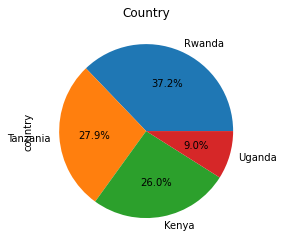

In [ ]:
# This variable is a categorical nominal data, so we  will use a pie chart to visualize data.

df.country.value_counts().plot.pie(autopct='%1.1f%%')

plt.title('Country')

# Displaying
plt.show()

In [ ]:
# Calculating the mode

df.country.mode()


0    Rwanda
Name: country, dtype: category
Categories (4, object): ['Kenya', 'Rwanda', 'Tanzania', 'Uganda']

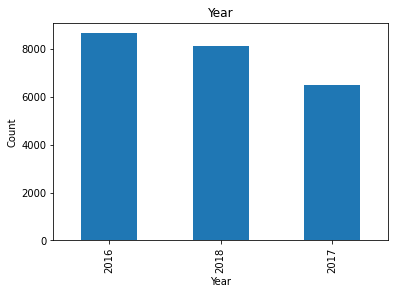

In [ ]:
# This variable is a categorical ordinal data, so we  will use a bar chart to visualize data.

df.year.value_counts().plot.bar()

plt.title('Year')

# Labelling our y axis
plt.ylabel('Count')

# Labelling our x axis
plt.xlabel('Year')

# Displaying
plt.show()

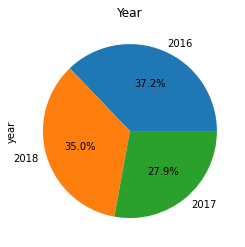

In [ ]:
# Using a pie chart to visualize data.

df.year.value_counts().plot.pie(autopct='%1.1f%%')

plt.title('Year')

# Displaying
plt.show()

In [ ]:
# Calculating measures of central tendency

print(df.year.mean())
print(df.year.median())
print(df.year.mode())

2016.977952215502
2017.0
0    2016
dtype: int64


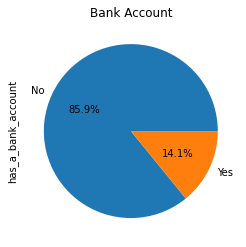

In [ ]:
# This variable is a categorical nominal data, so we  will use a pie chart to visualize data.

df.has_a_bank_account.value_counts().plot.pie(autopct='%1.1f%%')

plt.title('Bank Account')

plt.show()


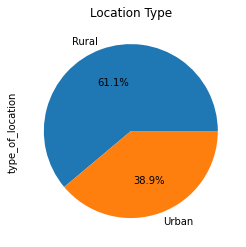

In [ ]:
# This variable is a categorical nominal data, so we  will use a pie chart to visualize data.

df.type_of_location.value_counts().plot.pie(autopct='%1.1f%%')

plt.title('Location Type')

# Displaying
plt.show()

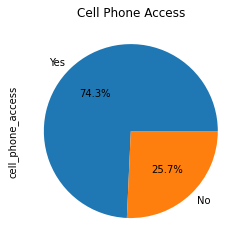

In [ ]:
# This variable is a categorical nominal data, so we  will use a pie chart to visualize data.

df.cell_phone_access.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Cell Phone Access')

plt.show()

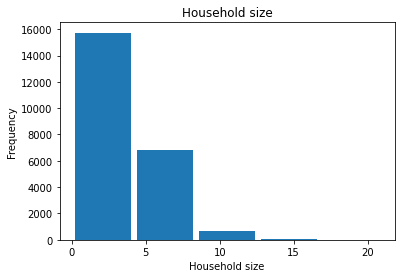

In [ ]:
# This variable is a continuous numerical data, so we  will use a histogram to visualize data.

df.household_size.plot.hist( bins= 5,  rwidth=0.9)

plt.title('Household size')

# Labelling our x axis
plt.xlabel('Household size')

# Displaying
plt.show()

In [ ]:
# Finding the mean and standard deviation

print("The average number of people living in one house is : ", df["household_size"].mean(), "with a standard deviation of : ", df["household_size"].std())
print("The highest number of people living in one house : ", df["household_size"].max())
print("The lowest number of people living in one house : ", df["household_size"].min())


The average number of people living in one house is :  3.688414189508 with a standard deviation of :  2.2808421547364386
The highest number of people living in one house :  21.0
The lowest number of people living in one house :  0.0


In [ ]:
# Calculating the quartiles
df["household_size"].quantile([0.25,0.5,0.75])

0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64

In [ ]:
# Calculating the skewness
print("Skewness is : ", df["household_size"].skew())

# The data is postively skewed implying that the mean is greater than the mode.

Skewness is :  0.9737983207814955


In [ ]:
# Calculating the kurtosis

df["household_size"].kurt()

# The kurtosis is greater than zero, so the distribution has heavier tails and is called a leptokurtic distribution.
# This implies that the data contains outliers.


1.1530073057375057

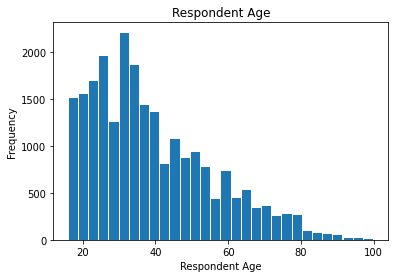

In [ ]:
# This variable is a continuous numerical data, so we  will use a histogram to visualize data.

df.respondent_age.plot.hist(bins= 30,  rwidth=0.9)

plt.title('Respondent Age')

# Labelling our x axis
plt.xlabel('Respondent Age')

plt.show()

In [ ]:
# Finding the mean and standard deviation
print("The mean age of respondents is : ", df["respondent_age"].mean(), "with a standard deviation of : ", df["respondent_age"].std())
print("The highest age of respondents is : ", df["respondent_age"].max())
print("The lowest age of respondents is : ", df["respondent_age"].min())

The mean age of respondents is :  38.79354866383563 with a standard deviation of :  16.510610642873882
The highest age of respondents is :  100.0
The lowest age of respondents is :  16.0


In [ ]:
# Calculating the skewness
print("Skewness is : ", df["respondent_age"].skew())

# The data is postively skewed implying that the mean is greater than the mode.

Skewness is :  0.8412764239448531


In [ ]:
# Calculating the kurtosis

df["respondent_age"].kurt()

# The kurtosis is greater than zero, so the distribution has heavier tails and is called a leptokurtic distribution.
# This implies that the data contains outliers.


0.10122691422605756

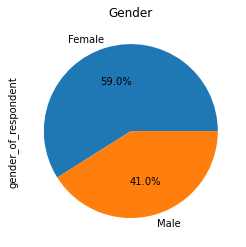

In [ ]:
df.gender_of_respondent.value_counts().plot.pie(autopct='%1.1f%%')

plt.title('Gender')

plt.show()

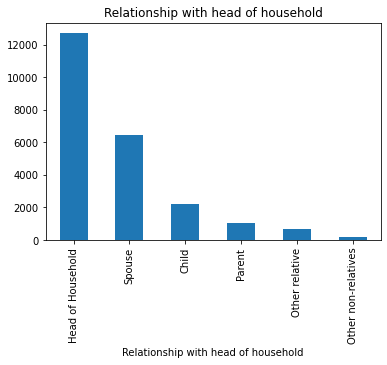

In [ ]:
df.the_relationship_with_head.value_counts().plot.bar()

plt.title('Relationship with head of household')

# Labelling our x axis
plt.xlabel('Relationship with head of household')

plt.show()

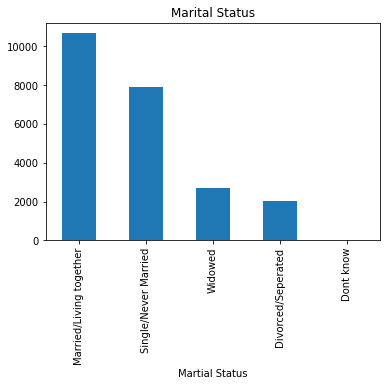

In [ ]:
df.marital_status.value_counts().plot.bar()

plt.title('Marital Status')

# Labelling our x axis
plt.xlabel('Martial Status')

plt.show()

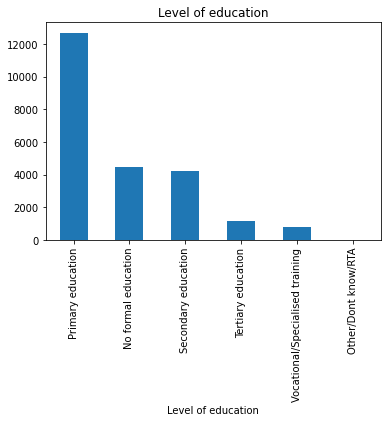

In [ ]:
df.level_of_education.value_counts().plot.bar()

plt.title('Level of education')

# Labelling our x axis
plt.xlabel('Level of education')

plt.show()


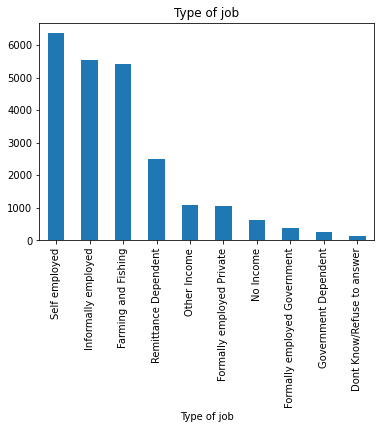

In [ ]:
df.type_of_job.value_counts().plot.bar()

plt.title('Type of job')

# Labelling our x axis
plt.xlabel('Type of job')

plt.show()

The univariate analysis shows that 59% of respondents are female with an average age of 38 years. 

61% of respondents live in rural areas with an average 3.6 people living in one house.

78% have at least a primary school education and 74%  have access to a cellphone.

86% of respondents do not have access to a bank account.



##### Respondents who have bank accounts only

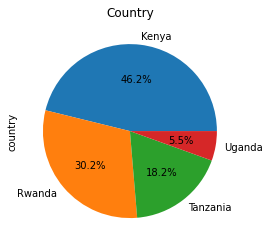

In [ ]:
# This variable is a categorical nominal data, so we  will use a pie chart to visualize data.

df_bank_account.country.value_counts().plot.pie(autopct='%1.1f%%')

plt.title('Country')

# Displaying
plt.show()

In [ ]:
# Calculating the mode

df_bank_account.country.mode()


0    Kenya
Name: country, dtype: category
Categories (4, object): ['Kenya', 'Rwanda', 'Tanzania', 'Uganda']

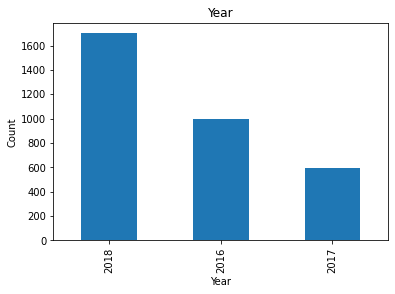

In [ ]:
# This variable is a categorical ordinal data, so we  will use a bar chart to visualize data.

df_bank_account.year.value_counts().plot.bar()

plt.title('Year')

# Labelling our y axis
plt.ylabel('Count')

# Labelling our x axis
plt.xlabel('Year')

# Displaying
plt.show()

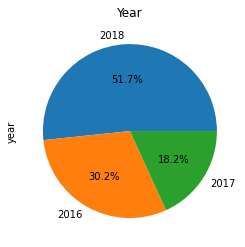

In [ ]:
# Using a pie chart to visualize data.

df_bank_account.year.value_counts().plot.pie(autopct='%1.1f%%')

plt.title('Year')

# Displaying
plt.show()

In [ ]:
# Calculating measures of central tendency

print(df_bank_account.year.mean())
print(df_bank_account.year.median())
print(df_bank_account.year.mode())

2017.2148283196598
2018.0
0    2018
dtype: int64


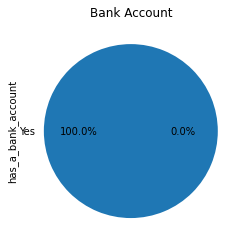

In [ ]:
# This variable is a categorical nominal data, so we  will use a pie chart to visualize data.

df_bank_account.has_a_bank_account.value_counts().plot.pie(autopct='%1.1f%%')

plt.title('Bank Account')

plt.show()


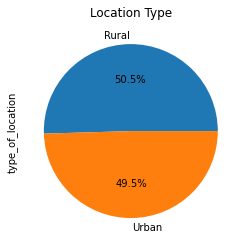

In [ ]:
# This variable is a categorical nominal data, so we  will use a pie chart to visualize data.

df_bank_account.type_of_location.value_counts().plot.pie(autopct='%1.1f%%')

plt.title('Location Type')

# Displaying
plt.show()

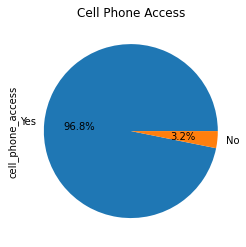

In [ ]:
# This variable is a categorical nominal data, so we  will use a pie chart to visualize data.

df_bank_account.cell_phone_access.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Cell Phone Access')

plt.show()

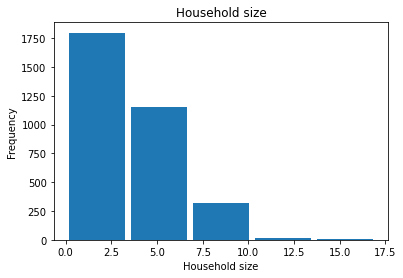

In [ ]:
# This variable is a continuous numerical data, so we  will use a histogram to visualize data.

df_bank_account.household_size.plot.hist( bins= 5,  rwidth=0.9)

plt.title('Household size')

# Labelling our x axis
plt.xlabel('Household size')

# Displaying
plt.show()

In [ ]:
# Finding the mean and standard deviation

print("The average number of people living in one house is : ", df_bank_account["household_size"].mean(), "with a standard deviation of : ", df_bank_account["household_size"].std())
print("The highest number of people living in one house : ", df_bank_account["household_size"].max())
print("The lowest number of people living in one house : ", df_bank_account["household_size"].min())


The average number of people living in one house is :  3.560316013369796 with a standard deviation of :  2.215912148038695
The highest number of people living in one house :  17.0
The lowest number of people living in one house :  0.0


In [ ]:
# Calculating the quartiles
df_bank_account["household_size"].quantile([0.25,0.5,0.75])

0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64

In [ ]:
# Calculating the skewness
print("Skewness is : ", df_bank_account["household_size"].skew())

# The data is postively skewed implying that the mean is greater than the mode.

Skewness is :  0.9665113178122235


In [ ]:
# Calculating the kurtosis

df_bank_account["household_size"].kurt()

# The kurtosis is greater than zero, so the distribution has heavier tails and is called a leptokurtic distribution.
# This implies that the data contains outliers.


1.2488385763985548

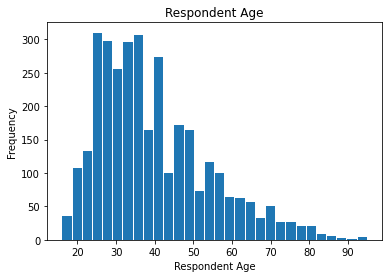

In [ ]:
# This variable is a continuous numerical data, so we  will use a histogram to visualize data.

df_bank_account.respondent_age.plot.hist(bins= 30,  rwidth=0.9)

plt.title('Respondent Age')

# Labelling our x axis
plt.xlabel('Respondent Age')

plt.show()

In [ ]:
# Finding the mean and standard deviation
print("The mean age of respondents is : ", df_bank_account["respondent_age"].mean(), "with a standard deviation of : ", df_bank_account["respondent_age"].std())
print("The highest age of respondents is : ", df_bank_account["respondent_age"].max())
print("The lowest age of respondents is : ", df_bank_account["respondent_age"].min())

The mean age of respondents is :  39.579155271953816 with a standard deviation of :  14.331041934682725
The highest age of respondents is :  95.0
The lowest age of respondents is :  16.0


In [ ]:
# Calculating the skewness
print("Skewness is : ", df_bank_account["respondent_age"].skew())

# The data is postively skewed implying that the mean is greater than the mode.

Skewness is :  0.9381641693425018


In [ ]:
# Calculating the kurtosis

df_bank_account["respondent_age"].kurt()

# The kurtosis is greater than zero, so the distribution has heavier tails and is called a leptokurtic distribution.
# This implies that the data contains outliers.


0.47697423859617416

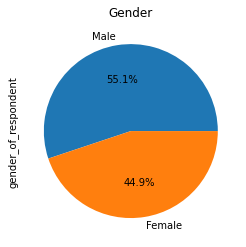

In [ ]:
df_bank_account.gender_of_respondent.value_counts().plot.pie(autopct='%1.1f%%')

plt.title('Gender')

plt.show()

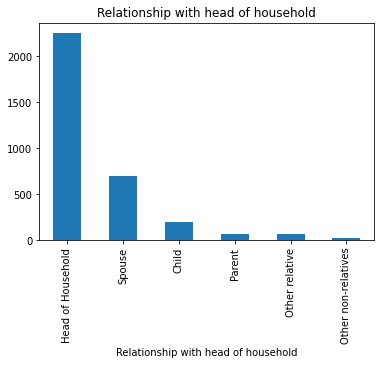

In [ ]:
df_bank_account.the_relationship_with_head.value_counts().plot.bar()

plt.title('Relationship with head of household')

# Labelling our x axis
plt.xlabel('Relationship with head of household')

plt.show()

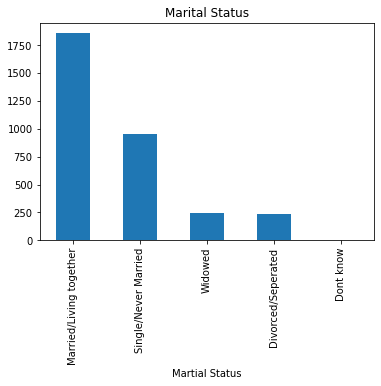

In [ ]:
df_bank_account.marital_status.value_counts().plot.bar()

plt.title('Marital Status')

# Labelling our x axis
plt.xlabel('Martial Status')

plt.show()

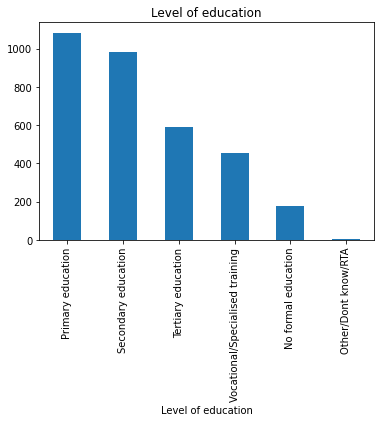

In [ ]:
df_bank_account.level_of_education.value_counts().plot.bar()

plt.title('Level of education')

# Labelling our x axis
plt.xlabel('Level of education')

plt.show()


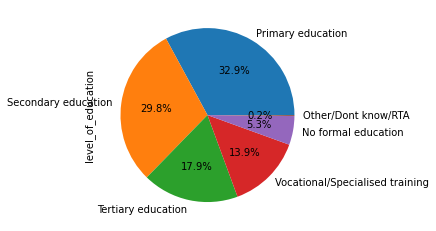

In [ ]:

df_bank_account.level_of_education.value_counts().plot.pie(autopct='%1.1f%%')

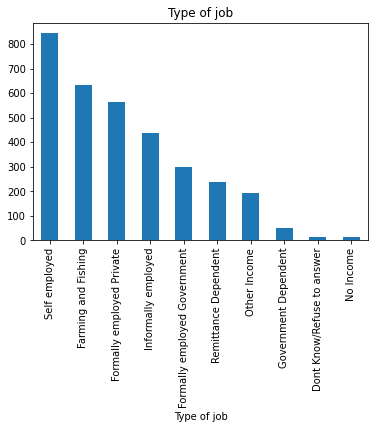

In [ ]:
df_bank_account.type_of_job.value_counts().plot.bar()

plt.title('Type of job')

# Labelling our x axis
plt.xlabel('Type of job')

plt.show()

> When analysing univariate data for respondents who have a bank account, we notice a difference in respondents background.
The univariate analysis shows that 55% of respondents are male with an average age of 40 years. 50% of respondents live in rural areas with an average 3.5 people living in one house. 94% have at least a primary school education and 97%  have access to a cell phone.

> From this data, we can conclude that gender, cell phone access and level of education can potentially be factors that determine the likelihood of a person owing a bank account 


#### Bivariate Analysis

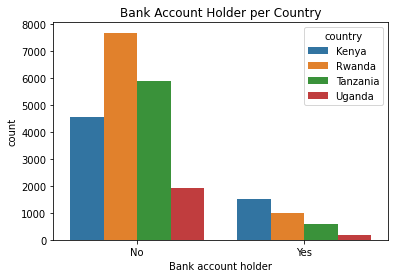

In [ ]:
sns.countplot(hue='country', x='has_a_bank_account', data=df)

plt.title('Bank Account Holder per Country')

# Labelling our x axis
plt.xlabel('Bank account holder')

plt.show()

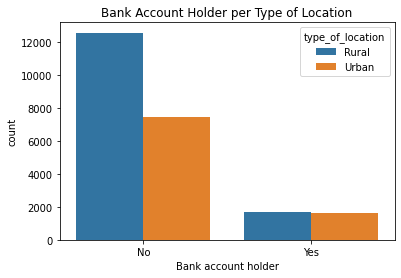

In [ ]:
sns.countplot(hue='type_of_location', x='has_a_bank_account', data=df)

plt.title('Bank Account Holder per Type of Location')

# Labelling our x axis
plt.xlabel('Bank account holder')

plt.show()

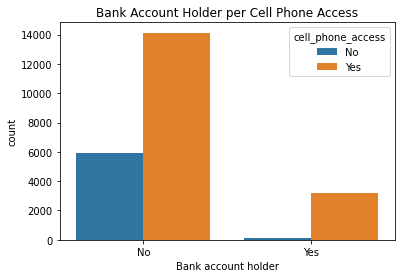

In [ ]:
sns.countplot(hue='cell_phone_access', x='has_a_bank_account', data=df)

plt.title('Bank Account Holder per Cell Phone Access')

# Labelling our x axis
plt.xlabel('Bank account holder')

plt.show()

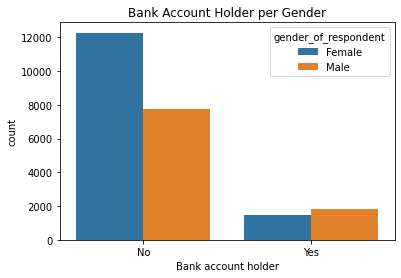

In [ ]:
sns.countplot(hue='gender_of_respondent', x='has_a_bank_account', data=df)

plt.title('Bank Account Holder per Gender')

# Labelling our x axis
plt.xlabel('Bank account holder')

plt.show()

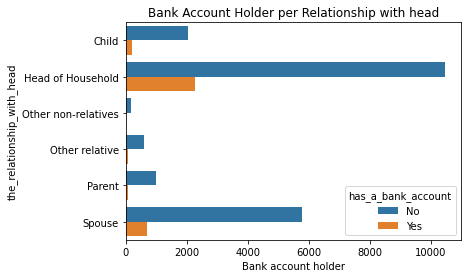

In [ ]:
sns.countplot(y='the_relationship_with_head', hue='has_a_bank_account', data=df)

plt.title('Bank Account Holder per Relationship with head')

# Labelling our x axis
plt.xlabel('Bank account holder')

plt.show()

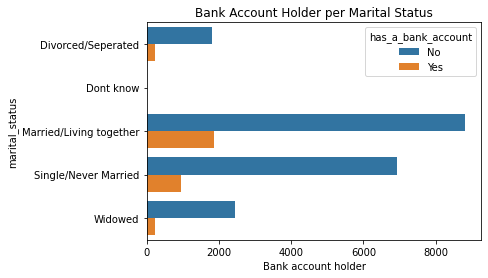

In [ ]:
sns.countplot(y='marital_status', hue='has_a_bank_account', data=df)

plt.title('Bank Account Holder per Marital Status')

# Labelling our x axis
plt.xlabel('Bank account holder')

plt.show()

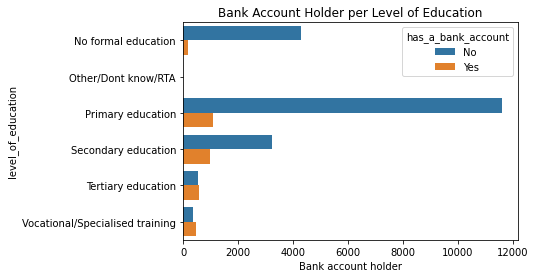

In [ ]:
sns.countplot(y='level_of_education', hue='has_a_bank_account', data=df)

plt.title('Bank Account Holder per Level of Education')

# Labelling our x axis
plt.xlabel('Bank account holder')

plt.show()

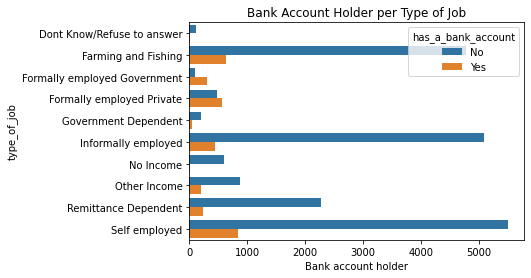

In [ ]:
sns.countplot(y='type_of_job', hue='has_a_bank_account', data=df)

plt.title('Bank Account Holder per Type of Job')

# Labelling our x axis
plt.xlabel('Bank account holder')

plt.show()

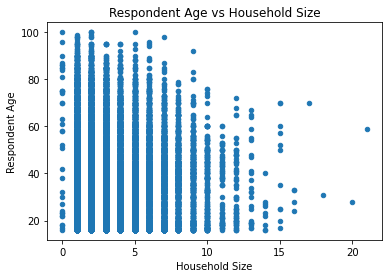

In [ ]:
# A scatter plot is not helpful here!! There are only 3 numerical variables in dataset (year, household size and age).
# It does not make sense to analyse these data together.


df.plot.scatter(y='respondent_age', x='household_size')
# Giving our scatterplot a title
plt.title('Respondent Age vs Household Size')

# Labelling our y axis
plt.ylabel('Respondent Age')

# Labelling our x axis
plt.xlabel('Household Size')

# Displaying our scatterplot
plt.show()

> The bivariate analysis was done in relation to the Bank Account. The results obtained were similar to results from the univariate analysis of respondents who have a bank account. So we can conclude that  gender, cell phone access and level of education are our variables of interest.

#### Multivariate Analysis

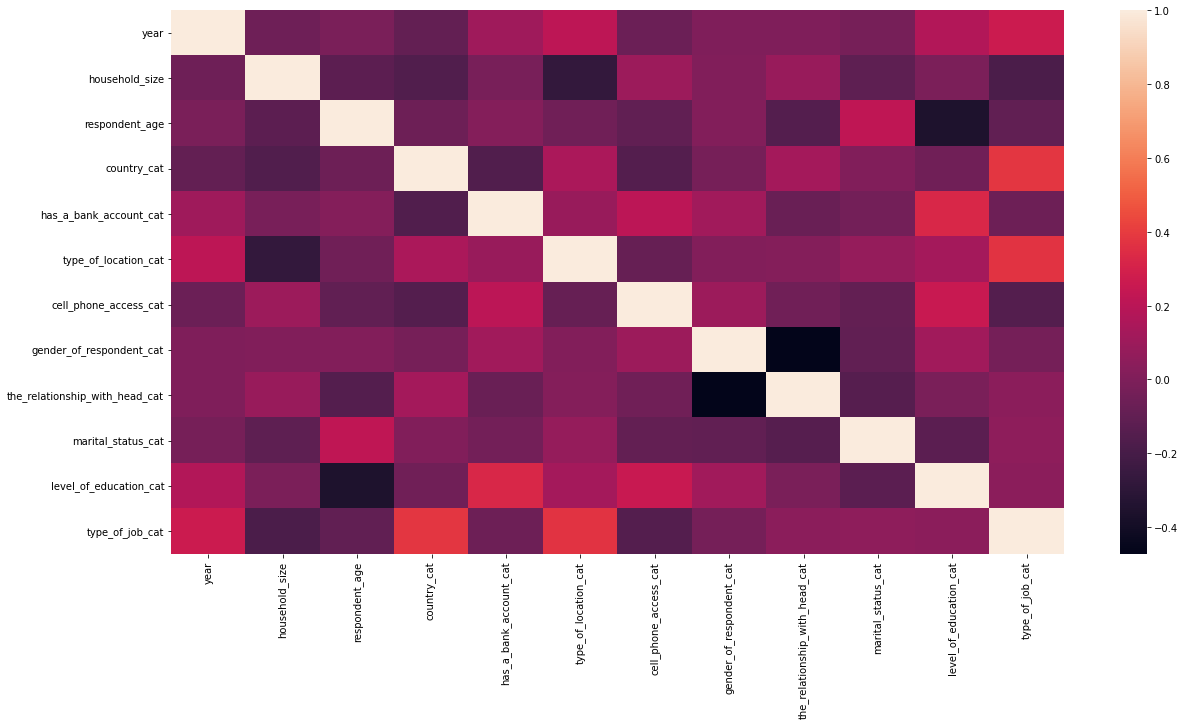

In [ ]:
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c)

> From the heat map, we can see that some variables are highly correlated.
We notice a strong negative relationship between gender and relationship with the head of household and between age and level of education.

Within the bank account variable, we can see level of education and cell phone access have approximately 0.4 correlation. From this heat map, we cannot identify other variables which are correlated to bank account.


##### **Factor Analysis**

In [ ]:
# Step 8: Adequacy Test
# Before we perform factor analysis,we need to evaluate the “factorability” of our dataset. 
# Factorability means "can we found the factors in the dataset?". 
# There are two methods to check the factorability or sampling adequacy:
# - Bartlett’s Test
# - Kaiser-Meyer-Olkin Test
# ---
# Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all 
# using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, 
# we should not employ a factor analysis.
# ---

# Installing factor analyzer 
!pip install factor_analyzer==0.2.3

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(df_numerical)
chi_square_value, p_value

print("Bartlett sphericity test")
print("Chi square value: ", chi_square_value)
print("P-value :", p_value)

# In Bartlett ’s test, the p-value is 0. The test was statistically significant, 
# indicating that the observed correlation matrix is not an identity matrix.

Bartlett sphericity test
Chi square value:  35288.55254898756
P-value : 0.0


In [ ]:
# Step 9:
# Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. 
# It determines the adequacy for each observed variable and for the complete model. 
# KMO estimates the proportion of variance among all the observed variable. 
# Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. 

# 
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model = calculate_kmo(df_numerical)
print("KMO Test Statistic",kmo_model)

# The overall KMO for our data is 0.5. 
# This value indicates that you can proceed with your planned factor analysis.

KMO Test Statistic 0.5654465116839654


Our KMO test value is between 0-1 meaning is suitable for factor analysis

In [ ]:
from factor_analyzer import FactorAnalyzer

In [ ]:
# Applying facor analysis on our standardized dataset
# Creating factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.analyze(df_numerical, 12, rotation=None)

# Checking the Eigenvalues
ev, v = fa.get_eigenvalues()
ev

# Only for 5-factors eigenvalues that are greater than one. So we will only choose 5 factors.

,Original_Eigenvalues
0,1.961304
1,1.833464
2,1.586914
3,1.185665
4,1.009888
5,0.858979
6,0.778111
7,0.725625
8,0.659580
9,0.519090


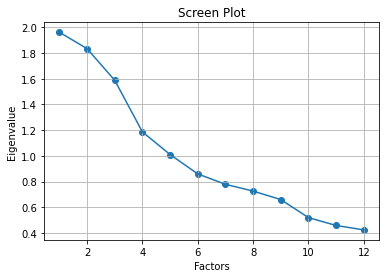

In [ ]:
# The screen plot method draws a straight line for each factor and its eigenvalues. 
# Number eigenvalues greater than one considered as the number of factors.

# Creating a screen plot using matplotlib
#
plt.scatter(range(1,df_numerical.shape[1]+1),ev)
plt.plot(range(1,df_numerical.shape[1]+1),ev)
plt.title('Screen Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
# Getting variance of each factors
# 
fa.get_factor_variance()

# Noting total 43% cumulative variance explained by the 5 factors.

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12
SS Loadings,1.489025,1.374089,1.157242,0.705626,0.456708,0.303738,0.239469,0.152729,0.107092,0.047603,0.004363,0.00000
Proportion Var,0.124085,0.114507,0.096437,0.058802,0.038059,0.025312,0.019956,0.012727,0.008924,0.003967,0.000364,0.00000
Cumulative Var,0.124085,0.238593,0.335030,0.393832,0.431891,0.457202,0.477158,0.489886,0.498810,0.502777,0.503140,0.50314


In [ ]:
# Performing Factor Analysis
# Creating factor analysis object and perform factor analysis
#
fa = FactorAnalyzer()
fa.analyze(df_numerical, 5, rotation="varimax")
fa.loadings

,Factor1,Factor2,Factor3,Factor4,Factor5
country_cat,0.488283,-0.044640,-0.270764,-0.159842,0.129192
year,0.161019,-0.003920,0.084098,0.980597,0.032787
has_a_bank_account_cat,-0.014318,0.077580,0.507191,0.079396,-0.051828
type_of_location_cat,0.540412,-0.004252,0.131108,0.131162,-0.089080
cell_phone_access_cat,-0.172929,0.061370,0.368058,-0.073107,0.137404
household_size,-0.385829,-0.031037,-0.051241,0.008900,0.270003
respondent_age,-0.107805,0.104519,-0.157183,0.024551,-0.581828
gender_of_respondent_cat,0.008021,0.985115,0.071686,-0.008478,0.151965
the_relationship_with_head_cat,0.028359,-0.504006,-0.109121,-0.004606,0.238723
marital_status_cat,0.101618,-0.012964,-0.041935,-0.022889,-0.390042


The higher a factor loading, the more important a variable is for said factor. A loading cutoff of 0.3 will be used here. This cutoff determines which variables belong to which factor.


*   Factor 1 : type of location, type of job, country, household size (-ve)
*   Factor 2 : gender, relationship with head (-ve)
*   Factor 3 : has bank account, level of education, has phone access
*   Factor 4 : year
*   Factor 5 : age(-ve), marital status(-ve), level of education

##### **Principal Component Analysis**

In [ ]:
X = df_numerical.drop('has_a_bank_account_cat', 1)
y = df_numerical['has_a_bank_account_cat']

In [ ]:
# Splitting the dataset into the Training set and Test set

#
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Normalization

# 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Applying PCA

# 
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
# Explained Variance Ratio

# 
explained_variance = pca.explained_variance_ratio_

# The first principal component is responsible for 17% variance. 
# Similarly, the second principal component causes 15% variance in the dataset. 

explained_variance

array([0.17688477, 0.15285181, 0.1413539 , 0.1010196 , 0.08854812,
       0.07696244, 0.06902533, 0.06032214, 0.05166776, 0.04273162,
       0.03863251])

In [ ]:
# Using 1 Principal Component

# 
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
# Training and Making Predictions

# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

# Noting that from the output that with only one feature, 
# the random forest algorithm is able to correctly predict 28 out of 30 instances, 
# resulting in 86% accuracy.

[[4009    0]
 [ 654    0]]
Accuracy 0.8597469440274501


In [ ]:
#  Results with 2 Principal Components
#

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Here the number of components for PCA has been set to 2 and the code is not working.

ValueError: ignored

##### **Discriminant Analysis**

In [ ]:
X = df_numerical.drop('has_a_bank_account_cat', 1).values
y = df_numerical['has_a_bank_account_cat'].values

In [ ]:
X

In [ ]:
y

In [ ]:
# The following code divides data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Feature scaling
# 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Peforming LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)


In [ ]:
# Training and Making Predictions
# 

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
# Evaluating the Performance


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

# We can see that with one linear discriminant, the algorithm achieved an accuracy of 88%.

## 7. Implementing the Solution

## 8. Challenging the solution

In [ ]:
# Reviewing the Solution 
#

## 9. Follow up questions